In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('E:\DataSets\diabetes.csv')

In [4]:
cols=list(df.columns)
print(cols)

['preg', 'glucose', 'bp_diastolic', 'skin_triceps', 'insulin', 'bmi', 'pedigree', 'age', 'label']


In [8]:
#x=train,y_test,x_test,y_train
#where 
# x is feature_column and y is label

In [5]:
#features_cols=cols['glucose','bmi','age']
#print(features_cols)

features_cols=['glucose','bmi', 'pedigree','age']
print(features_cols)

['glucose', 'bmi', 'pedigree', 'age']


In [6]:
#data frme
X=df[features_cols] # Features 
#series
y=df.label         # Target variable
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.3,random_state=1)

In [7]:
# get total numbers of 0 in the actual dataset
count0 = df['label'][df['label']==0].count()
count0

500

In [8]:
#data frame
X_train.shape

(537, 4)

In [9]:
len(y_train)

537

In [10]:
y_train

88     1
467    0
550    0
147    0
481    0
      ..
645    0
715    1
72     1
235    1
37     1
Name: label, Length: 537, dtype: int64

In [11]:
len(y_train[y_train==0])

354

In [12]:
X_test.shape

(231, 4)

In [13]:
len(y_test)

231

In [14]:
len(y_test[y_test==0])

146

In [16]:
from sklearn.linear_model import LogisticRegression

In [18]:
#create dEcision Tree classifer object
clf = LogisticRegression()

In [19]:
#Train classifer 
clf=clf.fit(X_train,y_train)

In [20]:
clf

LogisticRegression()

In [21]:
#predict the response for test dataset
y_pred=clf.predict(X_test)

In [22]:
len(y_pred)

231

# Evaluating a Classification Model

Basic Terminology

True Positives (TP): We correctly predicated that they do have diaetes

True Positives (TN): We correctly predicated that they don't have diaetes

False Positives (FP): We incorrectly predicated that they do have diaetes (a"Type i error")

False Positives (FN): We incorrectly predicated that they don't have diaetes (a"Type i error")

In [23]:
#calculate accuracy
from sklearn import metrics

In [24]:
result=metrics.confusion_matrix(y_test,y_pred)
print("Confusion Matrix")
print(result)

Confusion Matrix
[[132  14]
 [ 36  49]]


In [25]:
def plt1():
    import seaborn as sns;sns.set()
    c_mtrx=pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['predicted'])
    sns.heatmap(c_mtrx,annot=True,fmt = '.3g')

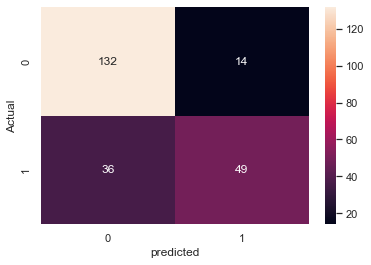

In [26]:
plt1()

In [27]:
#[Row, Column]
# [Actual,Predict]
TP = result[1, 1]   
TN = result[0, 0]
FP = result[0, 1]
FN = result[1, 0]

# Metrics computed from a confusio matrix

Classification Accuracy :Overall , how often is the classifer correct (TP+TN)/(TP+TN+FP+FN)

Classification Error (Misclassification Rate): Overall how often is the classifier incorrect (FP+FN)/(TP+TN +FP+FN)

Classification Error =1 Classification Accuracy

Sensititity (Recall ):When the actual value is positive ,how often is the prediction correct ? TP / (FN+TP)# (Row Wise)

Specificity: When the actual Value is negative how often is the prediction correct ? TN/(TN+FP)# (Row Wise)

Precision When a positve value is predicated how often is the prediction correct ? TP (TP+FP) # Column wise



false Positive rate: when the actual value is nagative how often is the prediction incorrect ? FP/ (TN+FP)  # Column wise

In [28]:
def EvClsMdl(res):
    print('Metrics computed from a confusion matrix')
    print("Accuracy:\t", metrics.accuracy_score(y_test, y_pred))
    print("Sensitivity:\t", metrics.recall_score(y_test, y_pred))
    print("Specificity:\t",TN / (TN + FP))
    print("Precision:\t", metrics.precision_score(y_test, y_pred))
    print("Classification Eerror:", 1 - metrics.accuracy_score(y_test, y_pred))
    print("False_Positive_Rate:", 1 - TN / (TN + FP))

In [29]:
EvClsMdl(result)

Metrics computed from a confusion matrix
Accuracy:	 0.7835497835497836
Sensitivity:	 0.5764705882352941
Specificity:	 0.9041095890410958
Precision:	 0.7777777777777778
Classification Eerror: 0.21645021645021645
False_Positive_Rate: 0.09589041095890416


In [92]:
#Metrics computed from a confusio matrix

# Regression Accucy matix

In [30]:
y= pd.DataFrame({'Original':y_test,'Predicated':y_pred})
y.head()

,Original,Predicated
285,0,0
101,0,0
581,0,0
352,0,0
726,0,0


In [31]:
y.tail()

,Original,Predicated
241,0,0
599,0,0
650,0,0
11,1,1
214,1,0


In [32]:
y.sample(10)

,Original,Predicated
540,1,0
159,1,1
757,1,0
714,0,0
628,0,0
17,1,0
701,1,0
172,0,0
747,0,0
705,0,0
